In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import seaborn as sns
# sns.set()
%matplotlib inline

## DBSCAN

Let's see what this is all about...
(and make use of [this](http://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py))

Now I'll follow the demo more or less verbatim, then I'll try and have some fun with it.

In [3]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

Generate sample data

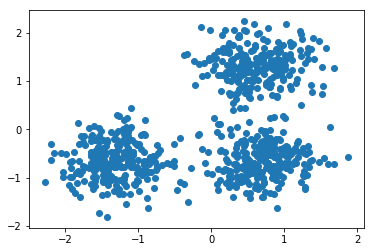

In [4]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)
plt.scatter(X[:,0], X[:,1])

Compute DBSCAN

In [5]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 3
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.883
Silhouette Coefficient: 0.626


Plot results

/home/guzzo/Software/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/lines.py:1206: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


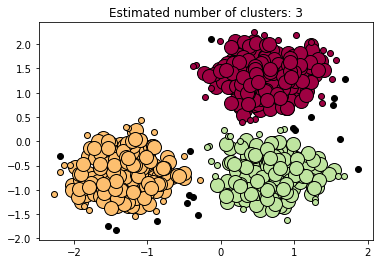

In [6]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)

## The iris dataset

Can we try a similar thing on the iris dataset?

In [7]:
from sklearn.datasets import load_iris

In [8]:
iris = load_iris()

In [9]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

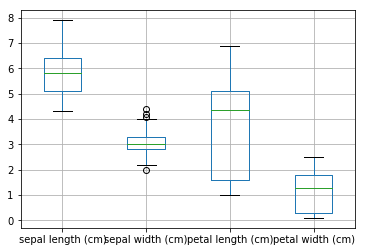

In [10]:
pd.DataFrame(iris.data, columns=iris.feature_names).boxplot()

In [19]:
X = iris.data
db = DBSCAN(eps=0.4, min_samples=10, n_jobs=-1).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
labels_true = iris.target

In [20]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 3
Homogeneity: 0.567
Completeness: 0.576
V-measure: 0.571
Adjusted Rand Index: 0.457
Adjusted Mutual Information: 0.558
Silhouette Coefficient: 0.121


In [21]:
# labels = iris.target
# labels.shape

In [22]:
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

/home/guzzo/Software/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/lines.py:1206: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


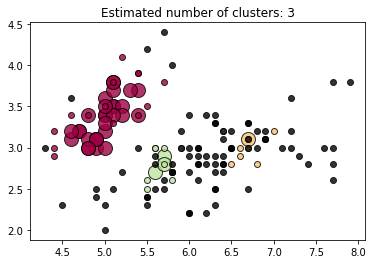

In [23]:
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14, alpha= 0.8)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6, alpha= 0.8)

plt.title('Estimated number of clusters: %d' % n_clusters_)


In [38]:
def run_dbscan(eps=0.4, min_samples=10, dataset=iris):
    X = iris.data
    db = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=-1).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    labels_true = iris.target
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    output_dict = {
    'Estimated number of clusters': n_clusters_,
    "Homogeneity": metrics.homogeneity_score(labels_true, labels),
    "Completeness": metrics.completeness_score(labels_true, labels),
    "V-measure": metrics.v_measure_score(labels_true, labels),
    "Adjusted Rand Index":
          metrics.adjusted_rand_score(labels_true, labels),
    "Adjusted Mutual Information": 
          metrics.adjusted_mutual_info_score(labels_true, labels),
    "Silhouette Coefficient":
          metrics.silhouette_score(X, labels),
    }
    return output_dict

/home/guzzo/Software/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/lines.py:1206: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


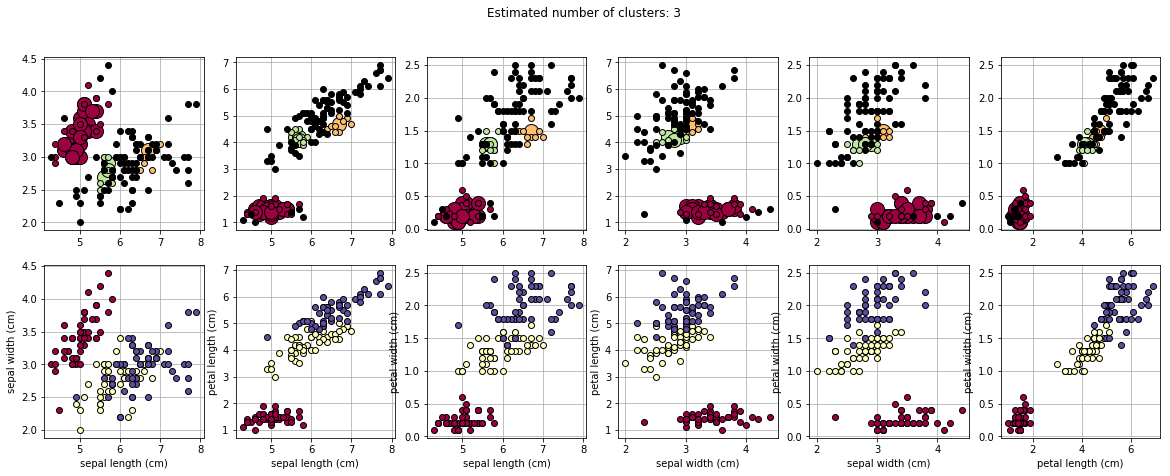

In [25]:
import scipy
plt.figure(figsize=(20,7))
plt.suptitle('Estimated number of clusters: %d' % n_clusters_)
# plt.legend(loc='best')
axes_labels = iris.feature_names
n_cols = X.shape[1]
n_plots = int(scipy.special.binom(n_cols, 2))
# print("n_plots", n_plots)
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
unique_t_labels = set(iris.target)
colors_true = plt.cm.Spectral(np.linspace(0, 1, len(unique_t_labels)))
n = 1
for i in range(n_cols):
    for j in range(i+1 ,n_cols):
#         print(i, j, n)
        plt.subplot(2, n_plots, n)
#         plt.title(f'')
        plt.grid()
        # Plot results of clustering algorithm
        for k, col in zip(unique_labels, colors):
            if k == -1:
                # Black used for noise.
                col = 'k'

            class_member_mask = (labels == k)
    
            xy = X[class_member_mask & core_samples_mask]
            plt.plot(xy[:, i], xy[:, j], 'o', markerfacecolor=col,
                     markeredgecolor='k', markersize=14)

            xy = X[class_member_mask & ~core_samples_mask]
            plt.plot(xy[:, i], xy[:, j], 'o', markerfacecolor=col,
                     markeredgecolor='k', markersize=6)
        # Plot true labels
        plt.subplot(2, n_plots, n_plots+n)
        plt.grid()
        plt.xlabel(f'{axes_labels[i]}')
        plt.ylabel(f'{axes_labels[j]}')

        for k, col in zip(unique_t_labels, colors_true):
#             print(k, col)
            class_member_mask = (iris.target == k)
    
            xy2 = X[class_member_mask]
            plt.plot(xy2[:, i], xy2[:, j], 'o', markerfacecolor=col,
                     markeredgecolor='k', markersize=6)

#             xy = X[class_member_mask & ~core_samples_mask]
#             plt.plot(xy[:, i], xy[:, j], 'o', markerfacecolor=col,
#                      markeredgecolor='k', markersize=6)
        
        n += 1
    
# plt.subplot(111)
# plt.plot(range(10))


In [41]:
my_sweep = [run_dbscan(eps=e) for e in np.linspace(0.3, 0.5, 21)]
# [print(x["Estimated number of clusters"]) for x in my_sweep]
my_sweep

[{'Adjusted Mutual Information': 0.2465996688793014,
  'Adjusted Rand Index': 0.18631545133311922,
  'Completeness': 0.55168637923413577,
  'Estimated number of clusters': 1,
  'Homogeneity': 0.25128537524048083,
  'Silhouette Coefficient': 0.41376582772546094,
  'V-measure': 0.3452941353126871},
 {'Adjusted Mutual Information': 0.3048550161390568,
  'Adjusted Rand Index': 0.26090054536983748,
  'Completeness': 0.62519485419972576,
  'Estimated number of clusters': 1,
  'Homogeneity': 0.30916397970604864,
  'Silhouette Coefficient': 0.48001452933650796,
  'V-measure': 0.41373340134893438},
 {'Adjusted Mutual Information': 0.33048035220050737,
  'Adjusted Rand Index': 0.29460260165946189,
  'Completeness': 0.65806634908964035,
  'Estimated number of clusters': 1,
  'Homogeneity': 0.33462616153322694,
  'Silhouette Coefficient': 0.50636361180911105,
  'V-measure': 0.44365443291575152},
 {'Adjusted Mutual Information': 0.33048035220050737,
  'Adjusted Rand Index': 0.29460260165946189,
  '